<a href="https://colab.research.google.com/github/JayShekhavat/Stock-Price-Prediction-Project-RNN-/blob/main/AI_Stock_price_prediction(RNN)_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import important libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


##**Load csv file with the help of pandas**

In [2]:
df = pd.read_csv("/content/AXISBANK-BSE.csv")

In [3]:
df.head()

,date,open,high,low,close,volume,dividend_amount
0,2005-01-03,187.00,190.00,185.15,188.95,276055.0,0.0
1,2005-01-04,188.05,191.30,187.00,188.05,195660.0,0.0
2,2005-01-05,189.00,189.25,176.00,183.60,275045.0,0.0
3,2005-01-06,181.00,187.90,177.00,182.50,257265.0,0.0
4,2005-01-07,185.80,190.30,182.25,189.10,387115.0,0.0


##**Shape of the dataset**

In [4]:
df.shape

(4083, 7)

###There are 4083 rows and 7 columns in the dataset

##**Find values count of dataset**

In [5]:
df.value_counts().sum()

4083

In [6]:
df.nunique()

,0
date,4083
open,2635
high,3166
low,3177
close,3701
volume,4071
dividend_amount,14


In [7]:
df['dividend_amount'].value_counts()

,count
dividend_amount,
0.00,4069
5.00,2
0.56,1
0.70,1
0.90,1
1.20,1
2.00,1
2.40,1
2.80,1


In [8]:
df['dividend_amount'].nunique()

14

In [9]:
df['dividend_amount'].unique()

array([0.  , 0.56, 0.7 , 0.9 , 1.2 , 2.  , 2.4 , 2.8 , 3.2 , 3.6 , 4.  ,
       4.6 , 5.  , 1.  ])

##**Drop 'close' column of dataset in the new dataframe**

In [10]:
df1 = df['close']

##**Draw the line plot of new datafram**e

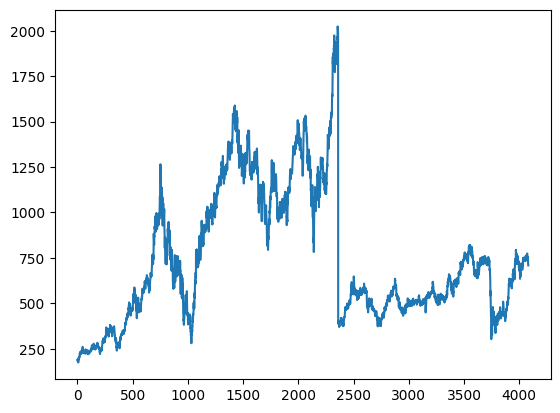

In [11]:
plt.plot(df1)

#**Reshape the 'close' feature of the datatet**

In [12]:
data = df['close'].values.reshape(-1, 1)

In [13]:
data

array([[188.95],
       [188.05],
       [183.6 ],
       ...,
       [722.7 ],
       [717.2 ],
       [709.  ]])

#**Normalze the selected data**

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [15]:
scaled_data

array([[0.00757494],
       [0.00708798],
       [0.00468023],
       ...,
       [0.29636944],
       [0.29339357],
       [0.28895682]])

##**Create a function which make new dataset of 'close' column and store into x and y**

In [16]:
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_sequences(scaled_data, time_steps)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (4023, 60, 1)
Shape of y: (4023, 1)


In [17]:
X

array([[[0.00757494],
        [0.00708798],
        [0.00468023],
        ...,
        [0.0306785 ],
        [0.02770263],
        [0.03565631]],

       [[0.00708798],
        [0.00468023],
        [0.00408506],
        ...,
        [0.02770263],
        [0.03565631],
        [0.03630559]],

       [[0.00468023],
        [0.00408506],
        [0.0076561 ],
        ...,
        [0.03565631],
        [0.03630559],
        [0.03468239]],

       ...,

       [[0.28571042],
        [0.28424954],
        [0.29336652],
        ...,
        [0.31398117],
        [0.31446813],
        [0.3012661 ]],

       [[0.28424954],
        [0.29336652],
        [0.29266313],
        ...,
        [0.31446813],
        [0.3012661 ],
        [0.29636944]],

       [[0.29336652],
        [0.29266313],
        [0.29315009],
        ...,
        [0.3012661 ],
        [0.29636944],
        [0.29339357]]])

##**Split the new dataset into train-test**

In [18]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

print("Training samples:", len(y_train))
print("Testing samples:", len(y_test))

Training samples: 3218
Testing samples: 805
Training samples: 3218
Testing samples: 805


##**Make a model by using Sequential method and add algorithms**

In [19]:
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(time_steps, 1)),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##**Compile the model with algorithms like 'adam' and 'lose'**

In [20]:
model.compile(optimizer='adam', loss='mse')

##**Draw Summary of model**

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

##**Fit the train data x and y into model and store into history variable**

In [22]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0645 - val_loss: 1.3198e-04
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 7.9401e-04 - val_loss: 9.6139e-05
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.5488e-04 - val_loss: 8.9217e-05
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.9381e-04 - val_loss: 8.9193e-05
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - val_loss: 8.7419e-05
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.6209e-04 - val_loss: 7.6001e-05
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.6718e-04 - val_loss: 8.9573e-05
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.9584e-04 - val_loss: 7.5894e-05
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6.6439e-04 - val_loss: 7.3166e-05
Epoch 10/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5.0858e-04 - val_loss: 8.2760e-05
Epoch 11/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - l

##**Plot the history data with label 'Training lose' and 'Validation lose'**

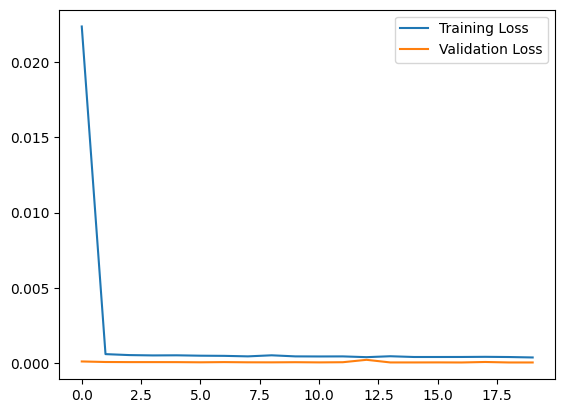

In [23]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

##**Predict the model by giving 'x_test'**

In [24]:
y_pred = model.predict(X_test)


y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [25]:
y_pred

array([[0.18009453],
       [0.1761764 ],
       [0.17408292],
       [0.19544998],
       [0.18973131],
       [0.1865892 ],
       [0.19662793],
       [0.18808588],
       [0.19471775],
       [0.20000125],
       [0.20149791],
       [0.2036535 ],
       [0.20521915],
       [0.20574774],
       [0.20404226],
       [0.20363098],
       [0.19918837],
       [0.19488293],
       [0.19307515],
       [0.18993728],
       [0.18799771],
       [0.194901  ],
       [0.19791757],
       [0.2010015 ],
       [0.20237425],
       [0.19871533],
       [0.20057695],
       [0.19790891],
       [0.19592172],
       [0.19392519],
       [0.1930026 ],
       [0.19948484],
       [0.1972457 ],
       [0.19761623],
       [0.1980332 ],
       [0.19799586],
       [0.19511238],
       [0.19186199],
       [0.18959205],
       [0.18630673],
       [0.18721643],
       [0.18457687],
       [0.18919162],
       [0.18643585],
       [0.18362346],
       [0.18230848],
       [0.17941746],
       [0.182

In [26]:
X_test

array([[[0.23425495],
        [0.23742019],
        [0.23290228],
        ...,
        [0.17903907],
        [0.17936371],
        [0.17871442]],

       [[0.23742019],
        [0.23290228],
        [0.22640948],
        ...,
        [0.17936371],
        [0.17871442],
        [0.17500812]],

       [[0.23290228],
        [0.22640948],
        [0.22640948],
        ...,
        [0.17871442],
        [0.17500812],
        [0.17292501]],

       ...,

       [[0.28571042],
        [0.28424954],
        [0.29336652],
        ...,
        [0.31398117],
        [0.31446813],
        [0.3012661 ]],

       [[0.28424954],
        [0.29336652],
        [0.29266313],
        ...,
        [0.31446813],
        [0.3012661 ],
        [0.29636944]],

       [[0.29336652],
        [0.29266313],
        [0.29315009],
        ...,
        [0.3012661 ],
        [0.29636944],
        [0.29339357]]])

##**Plot a figure with line plot to show 'Stock price prediction' of Actual stock price and Predicted stock price**  

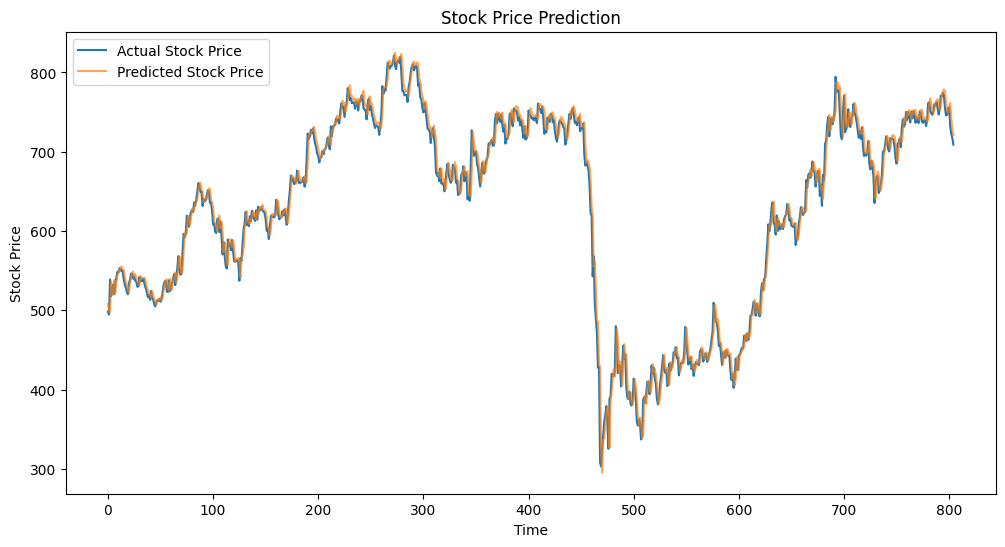

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Stock Price')
plt.plot(y_pred_rescaled, label='Predicted Stock Price', alpha=0.7)
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

###In the above figure Actual stock price and Predicted stock price are same with time

##**Evaluste mean absolute error and mean square error of model**

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 221.3875573742894
Mean Absolute Error: 10.78665491708317


##**Conclusion**
This is the **Stock Price Prediction project**. In this project, I used many libraries and algorithms to make a model by using RNN method. I apply many steps  in sequentially and find MSE and MAE which values are **215.62** and **10.46** respectively.